<a href="https://colab.research.google.com/github/gmezaarrepol/informacionCovid/blob/master/covid19_chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Graficos COVID-19 Chile
Gonzalo Meza Arrepol



In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


# Data conectada desde GitHub Ministerio de Ciencias

In [2]:
# conexion a data comuna diaria
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales_T.csv'
datamin = pd.read_csv(url, error_bad_lines=False)
datamin = datamin.fillna(0)
datamin.rename(columns = {'Fecha':'fechaDia'}, inplace = True)


In [3]:
datamin.tail()

,fechaDia,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales,Casos activos por FD,Casos activos por FIS,Casos recuperados por FIS,Casos recuperados por FD
115,2020-06-25,3778.0,259064.0,0.0,4903.0,34834.0,423.0,4648.0,104972.0,34834.0,219327.0,149189.0
116,2020-06-26,3422.0,263360.0,0.0,5068.0,34861.0,413.0,4296.0,102514.0,34861.0,223431.0,155778.0
117,2020-06-27,3481.0,267766.0,0.0,5347.0,34364.0,426.0,4406.0,100411.0,34364.0,228055.0,162008.0
118,2020-06-28,3396.0,271982.0,0.0,5509.0,34263.0,402.0,4216.0,97689.0,34263.0,232210.0,168784.0
119,2020-06-29,3092.0,275999.0,0.0,5575.0,34270.0,432.0,4017.0,96563.0,34270.0,236154.0,173861.0


In [4]:
fecha_ultimo_reporte = max(datamin['fechaDia'])
total_contagiados = max(datamin['Casos totales'])
total_fallecidos = max(datamin['Fallecidos'])
casos_nuevos =datamin['Casos totales'].iloc[-1]-datamin['Casos totales'].iloc[-2]
fallecidos_dia = datamin['Fallecidos'].iloc[-1]-datamin['Fallecidos'].iloc[-2]
print(f'Reporte del dia {fecha_ultimo_reporte}: {casos_nuevos:,.0f} casos nuevos, llegando a un total nacional de {total_contagiados:,.0f} casos totales. ')
print(f'Los fallecidos informados hoy son: {fallecidos_dia:,.0f}, lo que da un total de {total_fallecidos:,.0f}')

Reporte del dia 2020-06-29: 4,017 casos nuevos, llegando a un total nacional de 275,999 casos totales. 
Los fallecidos informados hoy son: 66, lo que da un total de 5,575


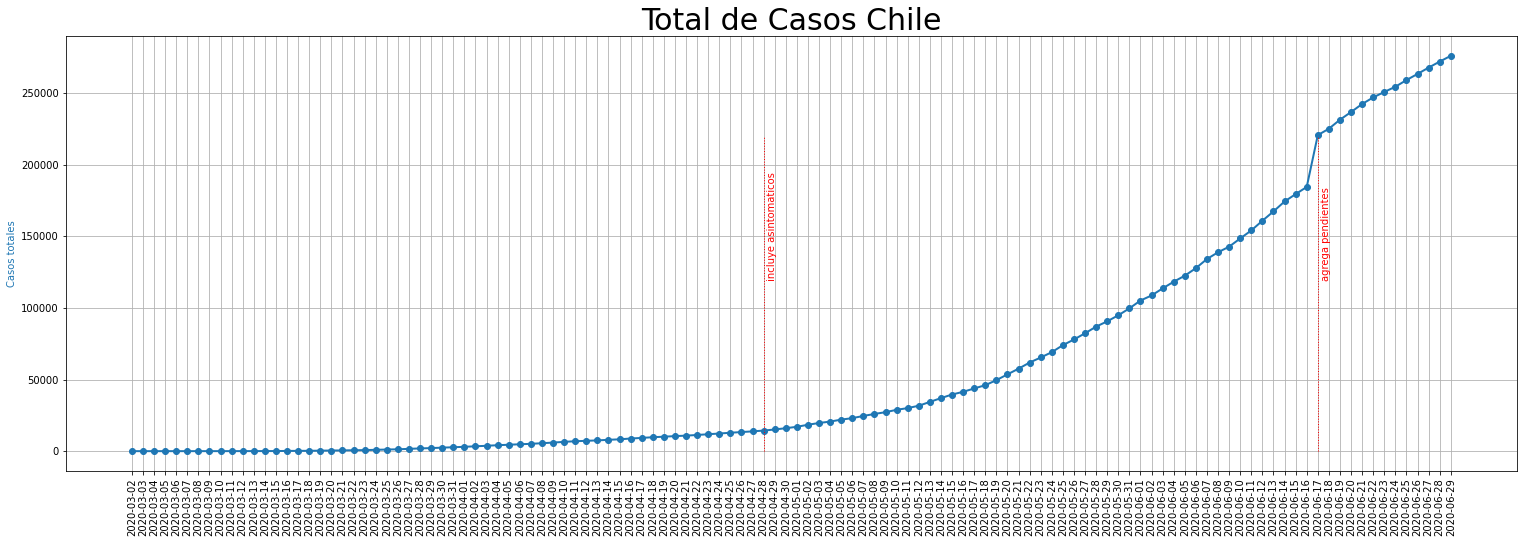

In [5]:
fig, ax3 = plt.subplots(figsize=(26,8))

# define la primera variable a graficar
color = 'tab:blue'
ax3.set_ylabel('Casos totales', color=color)
ax3.plot('fechaDia', 'Casos totales', data=datamin ,color=color,linewidth=2.0, marker='o')
ax3.set_xticklabels(datamin['fechaDia'], rotation = 90)
plt.title('Total de Casos Chile', fontsize=30)
ax3.xaxis.grid() # grilla 
ax3.yaxis.grid() # grilla

# cambio en la metodologia de cuenta (se incluyen asintomaticos) 29/04
x1 = 57
x2 = 57
y1 = 0
y2 = 220000
plt.plot([x1, x2], [y1, y2], color='r', linestyle='dotted', linewidth=1)
ax3.annotate('incluye asintomaticos', xy=(x2, y2), xytext=(x2 + 0.3, y2 - 100000), color = 'r', rotation=90)

x10 = 107
x20 = 107
y10 = 0
y20 = 220000
plt.plot([x10, x20], [y10, y20], color='r', linestyle='dotted', linewidth=1)
ax3.annotate('agrega pendientes', xy=(x20, y20), xytext=(x20 + 0.3, y20 - 100000), color = 'r', rotation=90)

plt.show()

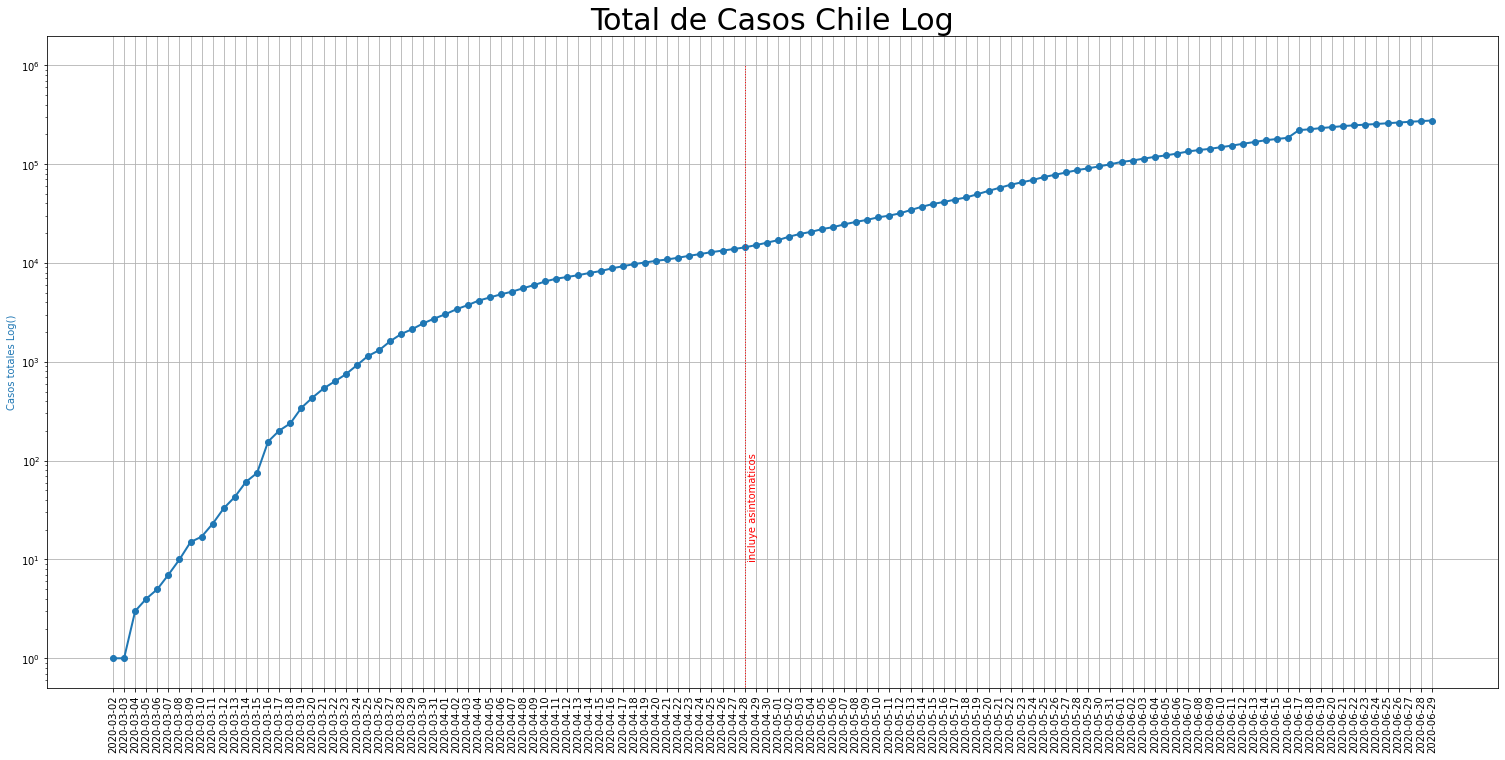

In [6]:
fig, ax3 = plt.subplots(figsize=(26,12))

# define la primera variable a graficar
color = 'tab:blue'
ax3.set_ylabel('Casos totales Log()', color=color)
ax3.plot('fechaDia', 'Casos totales', data=datamin ,color=color,linewidth=2.0, marker='o')
plt.title('Total de Casos Chile Log', fontsize=30)
ax3.set_xticklabels(datamin['fechaDia'], rotation = 90)
ax3.xaxis.grid() # grilla 
ax3.yaxis.grid() # grilla
plt.yscale('log')

# cambio en la metodologia de cuenta (se incluyen asintomaticos) 29/04
x1 = 57
x2 = 57
y1 = 0
y2 = 1000000
plt.plot([x1, x2], [y1, y2], color='r', linestyle='dotted', linewidth=1)
ax3.annotate('incluye asintomaticos', xy=(x2, y2), xytext=(x2 + 0.3, y1 + 10), color = 'r', rotation=90)
plt.show()

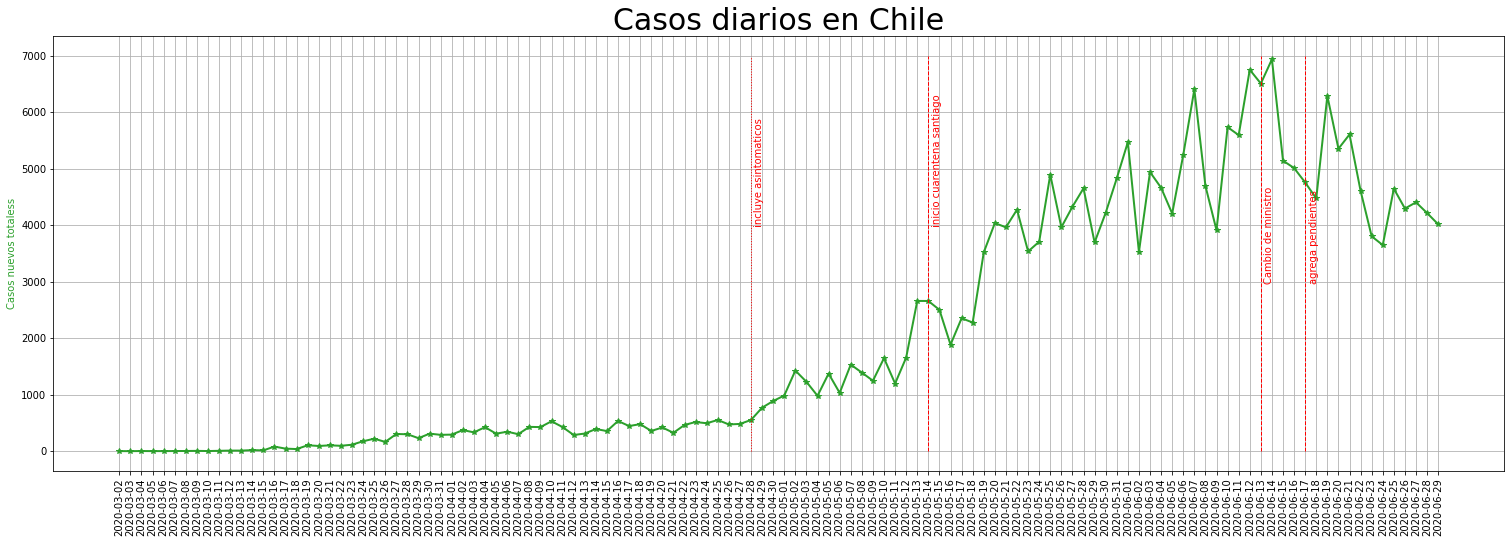

In [7]:
fig, ax3 = plt.subplots(figsize=(26,8))

# define la primera variable a graficar
color = 'tab:green'
ax3.set_ylabel('Casos nuevos totaless', color=color)
ax3.plot('fechaDia', 'Casos nuevos totales', data=datamin ,color=color,linewidth=2.0, marker='*')
plt.title('Casos diarios en Chile', fontsize=30)
ax3.set_xticklabels(datamin['fechaDia'], rotation = 90)
ax3.xaxis.grid() # grilla 
ax3.yaxis.grid() # grilla

# cambio en la metodologia de cuenta (se incluyen asintomaticos) 29/04
x1 = 57
x2 = 57
y1 = 0
y2 = 7000
plt.plot([x1, x2], [y1, y2], color='r', linestyle='dotted', linewidth=1)
ax3.annotate('incluye asintomaticos', xy=(x2, y2), xytext=(x2 + 0.3, y2 - 3000), color = 'r', rotation=90)

# inicio de la cuarentena en santiago viernes 15/05
x10 = 73
x20 = 73
y10 = 0
y20 = 7000
plt.plot([x10, x20], [y10, y20], color='r', linestyle='--', linewidth=1)
ax3.annotate('inicio cuarentena santiago', xy=(x2, y2), xytext=(x20 + 0.3, y20 - 3000), color = 'r', rotation=90)

# cambio Ministro de Salud
x100 = 103
x200 = 103
y100 = 0
y200 = 7000
plt.plot([x100, x200], [y100, y200], color='r', linestyle='--', linewidth=1)
ax3.annotate('Cambio de ministro', xy=(x200, y200), xytext=(x200 + 0.3, y200 - 4000), color = 'r', rotation=90)

# cambio Ministro de Salud
x1000 = 107
x2000 = 107
y1000 = 0
y2000 = 7000
plt.plot([x1000, x2000], [y1000, y2000], color='r', linestyle='--', linewidth=1)
ax3.annotate('agrega pendientes', xy=(x2000, y2000), xytext=(x2000 + 0.3, y2000 - 4000), color = 'r', rotation=90)

plt.show()

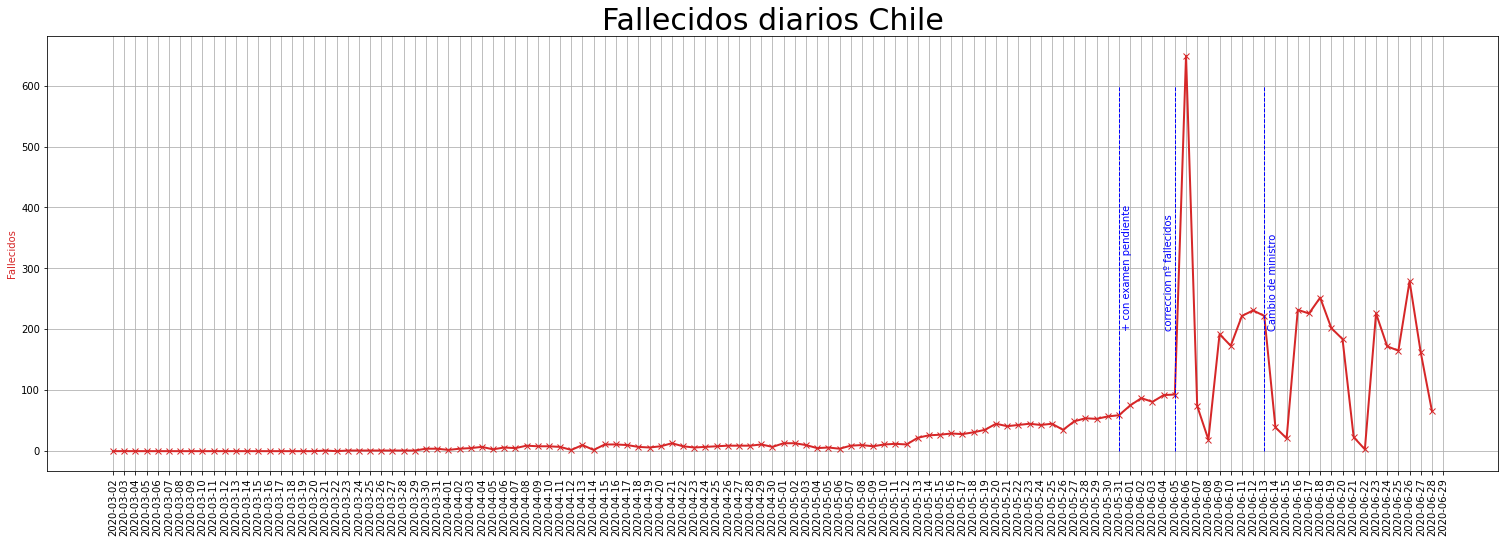

In [8]:
datamin['diaFallecidos'] = datamin['Fallecidos'].shift(-1) - datamin['Fallecidos'] 

fig, ax3 = plt.subplots(figsize=(26,8))

# define la primera variable a graficar
color = 'tab:red'
ax3.set_ylabel('Fallecidos', color=color)
ax3.plot('fechaDia', 'diaFallecidos', data=datamin ,color=color,linewidth=2.0, marker='x')
plt.title('Fallecidos diarios Chile', fontsize=30)
ax3.set_xticklabels(datamin['fechaDia'], rotation = 90)
ax3.xaxis.grid() # grilla 
ax3.yaxis.grid() # grilla

# a partir de la fecha 02/06 se suman aquellos que aun no estaban confirmados 

x10 = 90
x20 = 90
y10 = 0
y20 = 600
plt.plot([x10, x20], [y10, y20], color='b', linestyle='--', linewidth=1)
ax3.annotate('+ con examen pendiente', xy=(x20, y20), xytext=(x20 + 0.3, y20/3), color = 'b', rotation=90)

# a partir de la fecha 07/06 se corrige la suma de muertos
x10 = 95
x20 = 95
y10 = 0
y20 = 600
plt.plot([x10, x20], [y10, y20], color='b', linestyle='--', linewidth=1)
ax3.annotate('correccion nº fallecidos', xy=(x20, y20), xytext=(x20 - 1, y20/3), color = 'b', rotation=90)

# cambio Ministro de Salud
x100 = 103
x200 = 103
y100 = 0
y200 = 600
plt.plot([x100, x200], [y100, y200], color='b', linestyle='--', linewidth=1)
ax3.annotate('Cambio de ministro', xy=(x200, y200), xytext=(x200 + 0.3, y200/3), color = 'b', rotation=90)

plt.show()




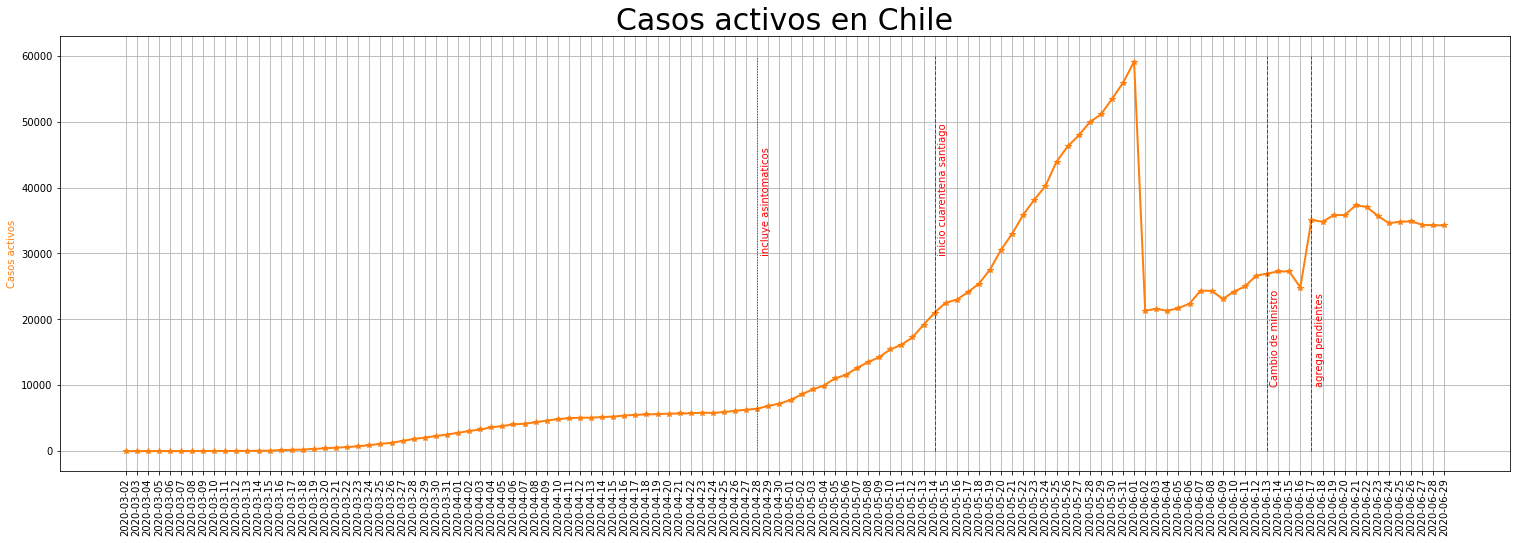

In [9]:
fig, ax3 = plt.subplots(figsize=(26,8))

# define la primera variable a graficar
color = 'tab:orange'
ax3.set_ylabel('Casos activos', color=color)
ax3.plot('fechaDia', 'Casos activos', data=datamin ,color=color,linewidth=2.0, marker='*')
plt.title('Casos activos en Chile', fontsize=30)
ax3.set_xticklabels(datamin['fechaDia'], rotation = 90)
ax3.xaxis.grid() # grilla 
ax3.yaxis.grid() # grilla

# cambio en la metodologia de cuenta (se incluyen asintomaticos) 29/04
x1 = 57
x2 = 57
y1 = 0
y2 = 60000
plt.plot([x1, x2], [y1, y2], color='r', linestyle='dotted', linewidth=1)
ax3.annotate('incluye asintomaticos', xy=(x2, y2), xytext=(x2 + 0.3, y2 - 30000), color = 'r', rotation=90)

# inicio de la cuarentena en santiago viernes 15/05
x10 = 73
x20 = 73
y10 = 0
y20 = 60000
plt.plot([x10, x20], [y10, y20], color='r', linestyle='--', linewidth=1)
ax3.annotate('inicio cuarentena santiago', xy=(x2, y2), xytext=(x20 + 0.3, y20 - 30000), color = 'r', rotation=90)

# cambio Ministro de Salud
x100 = 103
x200 = 103
y100 = 0
y200 = 60000
plt.plot([x100, x200], [y100, y200], color='r', linestyle='--', linewidth=1)
ax3.annotate('Cambio de ministro', xy=(x200, y200), xytext=(x200 + 0.3, y200 - 50000), color = 'r', rotation=90)

# cambio Ministro de Salud
x1000 = 107
x2000 = 107
y1000 = 0
y2000 = 60000
plt.plot([x1000, x2000], [y1000, y2000], color='r', linestyle='--', linewidth=1)
ax3.annotate('agrega pendientes', xy=(x2000, y2000), xytext=(x2000 + 0.3, y2000 - 50000), color = 'r', rotation=90)

plt.show()

# Analisis por Sector (R)

In [10]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


#### carga de packages

In [11]:
%%R
install.packages("ggplot")
install.packages("tidyverse")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_1.3.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 712837 bytes (696 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons

In [12]:
%%R
library(ggplot2)
library(tidyverse)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Analisis descriptivo

In [13]:
%%R
url2 <- 'https://raw.githubusercontent.com/gmezaarrepol/informacionCovid/master/data-covid19.csv'
data <- read.csv(url2, sep = ',')
str(data)


'data.frame':	1600 obs. of  8 variables:
 $ region           : Factor w/ 16 levels "Antofagasta",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ fecha            : Factor w/ 100 levels "2020/03/03","2020/03/04",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ casos_acum       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ confirmados      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ total_cada_100mil: num  0 0 0 0 0 0 0 0 0 0 ...
 $ fallecidos_nuevos: int  0 0 0 0 0 0 0 0 0 0 ...
 $ fallecidos_acum  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ notificados_acum : int  NA NA NA NA NA NA NA NA NA NA ...


In [14]:
%%R
# agrupar los datos para el grafico 1
totales <- data %>%
  group_by(region)%>%
  summarize(total = sum(confirmados))
totales

R[write to console]: `summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 16 x 2
   region              total
   <fct>               <int>
 1 Antofagasta          3559
 2 Araucanía            2488
 3 Arica y Parinacota    930
 4 Atacama               365
 5 Aysén                  21
 6 Biobío               2846
 7 Coquimbo             1256
 8 Los Lagos            1041
 9 Los Ríos              452
10 Magallanes           1089
11 Maule                2440
12 Metropolitana      119746
13 Ñuble                1616
14 O’Higgins            1442
15 Tarapacá             3591
16 Valparaíso           5614


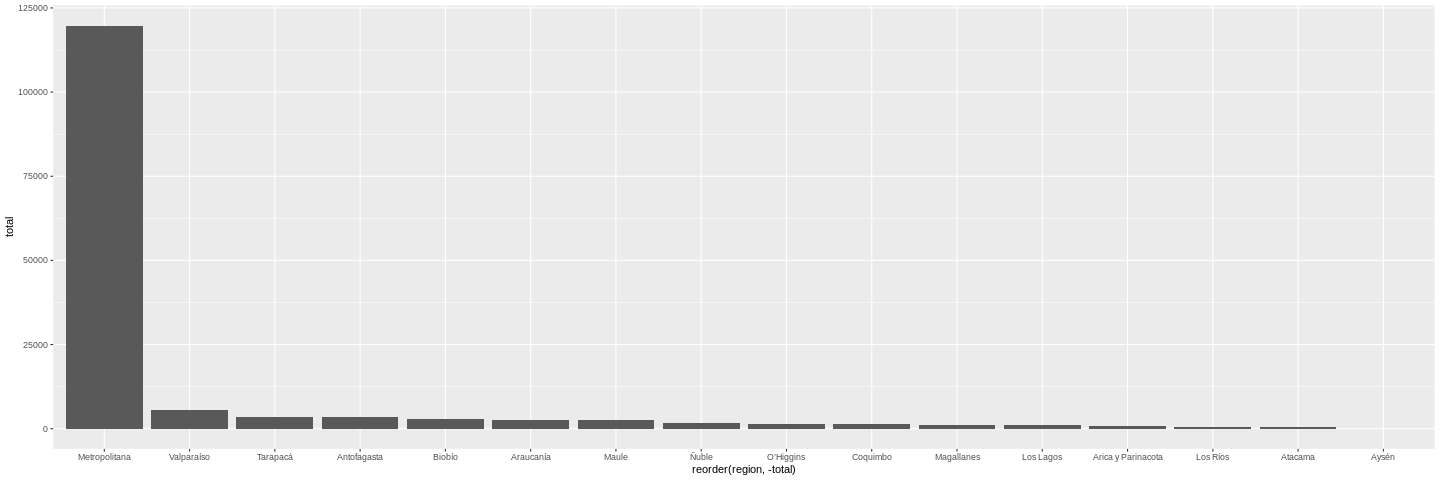

In [15]:
%%R -w 1440 -h 480 -u px
ggplot(totales, aes(x = reorder(region, -total), y = total, group = 1))+
  geom_col()

In [16]:
%%R
# crea los vectores /dataframe de regiones ordenada y poblacion de region, segun Wikipedia
region <- c('Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama', 
             'Coquimbo', 'Valparaíso', 'Metropolitana', 'O’Higgins', 
              'Maule', 'Ñuble', 'Biobío', 'Araucanía', 'Los Ríos', 
              'Los Lagos', 'Aysén', 'Magallanes')
orderregion <- seq(1,16,1)
pop <- c(226068, 330558, 607534, 286168, 757586, 1815902, 7112808, 914555, 1044950, 480609, 1556805, 957224, 384837, 828708, 103158, 166533)
regiones <- as.data.frame(cbind(orderregion, region, pop))
regiones$pop <- as.numeric(as.character(regiones$pop))
regiones$orderregion <- as.numeric(as.character(regiones$orderregion))
str(regiones)

'data.frame':	16 obs. of  3 variables:
 $ orderregion: num  1 2 3 4 5 6 7 8 9 10 ...
 $ region     : Factor w/ 16 levels "Antofagasta",..: 3 15 1 4 7 16 12 14 11 13 ...
 $ pop        : num  226068 330558 607534 286168 757586 ...


In [17]:
%%R
totalregion <- merge(x = totales, y = regiones[ , c('region','orderregion', 'pop')], by = 'region', all.x=TRUE)
totalregion

               region  total orderregion     pop
1         Antofagasta   3559           3  607534
2           Araucanía   2488          12  957224
3  Arica y Parinacota    930           1  226068
4             Atacama    365           4  286168
5               Aysén     21          15  103158
6              Biobío   2846          11 1556805
7            Coquimbo   1256           5  757586
8           Los Lagos   1041          14  828708
9            Los Ríos    452          13  384837
10         Magallanes   1089          16  166533
11              Maule   2440           9 1044950
12      Metropolitana 119746           7 7112808
13              Ñuble   1616          10  480609
14          O’Higgins   1442           8  914555
15           Tarapacá   3591           2  330558
16         Valparaíso   5614           6 1815902


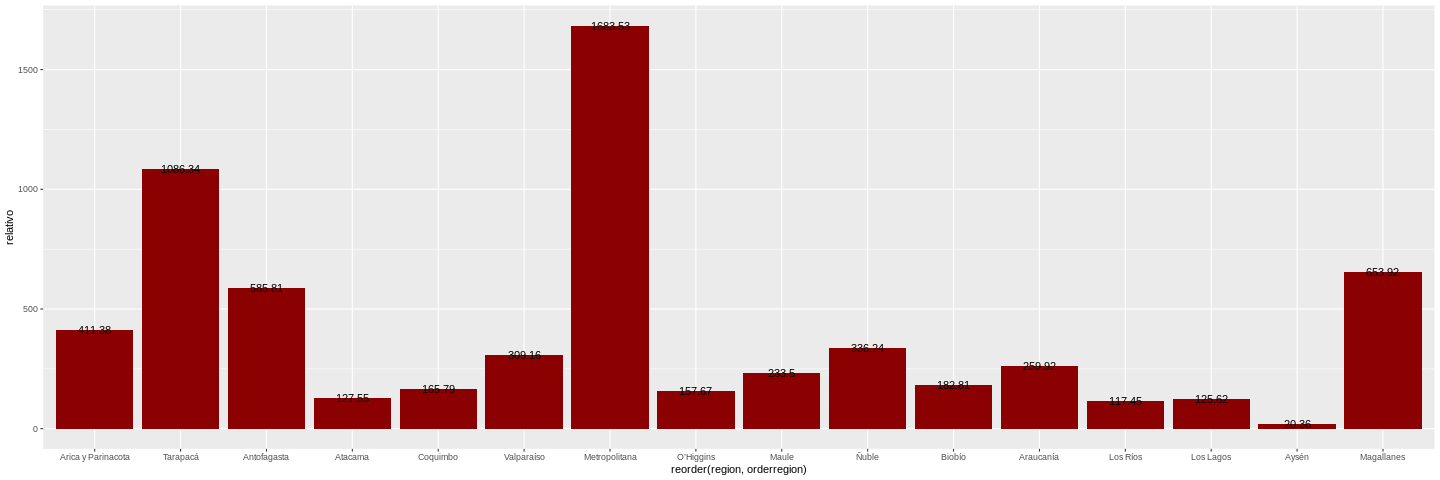

In [18]:
%%R -w 1440 -h 480 -u px
totalperc <- totalregion %>%
  mutate(relativo = (total/pop)*100000)

ggplot(totalperc, aes(x = reorder(region, orderregion), y = relativo, group = 1))+
  geom_col(fill = 'darkred')+
  geom_text(label = round(totalperc$relativo, digits = 2))
  #sprintf("%0.2f", round(a, digits = 2)


In [19]:
%%R
# agrupar los datos para el grafico 1
totalfecha <- data %>%
  group_by(region, fecha)%>%
  summarize(total = sum(confirmados))

R[write to console]: `summarise()` regrouping output by 'region' (override with `.groups` argument)



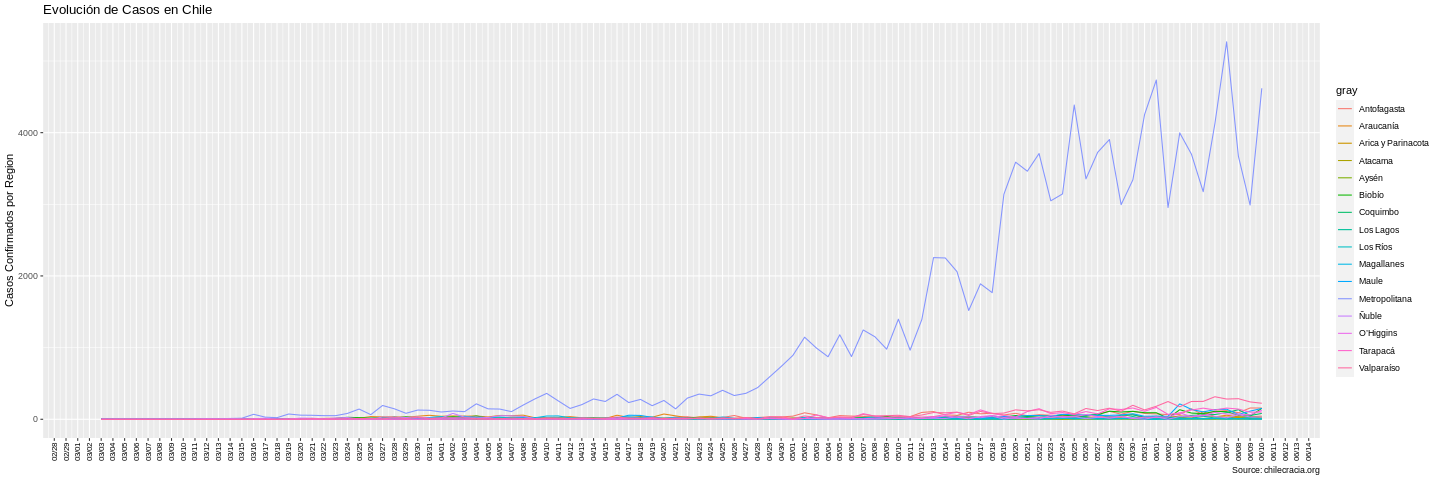

In [20]:
%%R -w 1440 -h 480 -u px
ggplot(totalfecha, aes(x = as.Date(fecha), y = total, group = region, color = region))+
  geom_line()+
  ggtitle('Evolución de Casos en Chile')+
  labs(caption="Source: chilecracia.org", color = 'gray')+
  xlab('Fecha')+
  scale_x_date(date_labels = "%m/%d", date_breaks = 'day')+
  ylab('Casos Confirmados por Region')+ 
  theme(axis.text.x = element_text(
    colour = 'black', angle = 90, size = 8,
    hjust = 0.5, vjust = 0.5),axis.title.x=element_blank())

R[write to console]: `summarise()` regrouping output by 'region' (override with `.groups` argument)



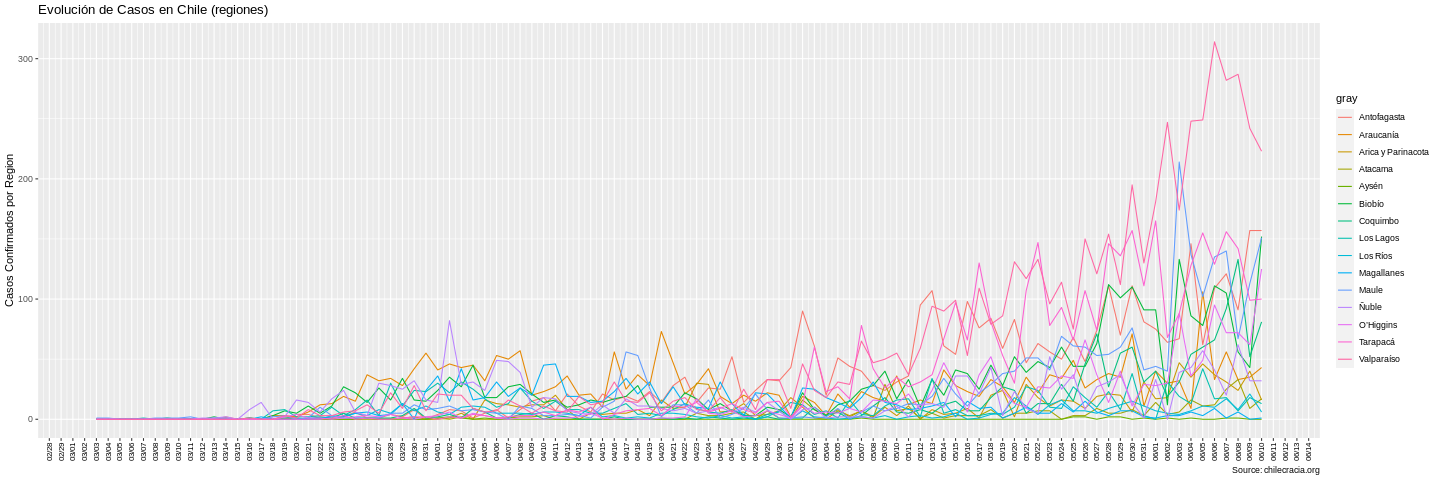

In [21]:
%%R -w 1440 -h 480 -u px
# agrupar los datos para el grafico 1
totalNoStgo<- data %>%
  filter(region != 'Metropolitana')%>%
  group_by(region, fecha)%>%
  summarize(total = sum(confirmados))


ggplot(totalNoStgo, aes(x = as.Date(fecha), y = total, group = region, color = region))+
  geom_line()+
  ggtitle('Evolución de Casos en Chile (regiones)')+
  labs(caption="Source: chilecracia.org", color = 'gray')+
  xlab('Fecha')+
  scale_x_date(date_labels = "%m/%d", date_breaks = 'day')+
  ylab('Casos Confirmados por Region')+ 
  theme(axis.text.x = element_text(
    colour = 'black', angle = 90, size = 8,
    hjust = 0.5, vjust = 0.5),axis.title.x=element_blank())

R[write to console]: `summarise()` regrouping output by 'region' (override with `.groups` argument)



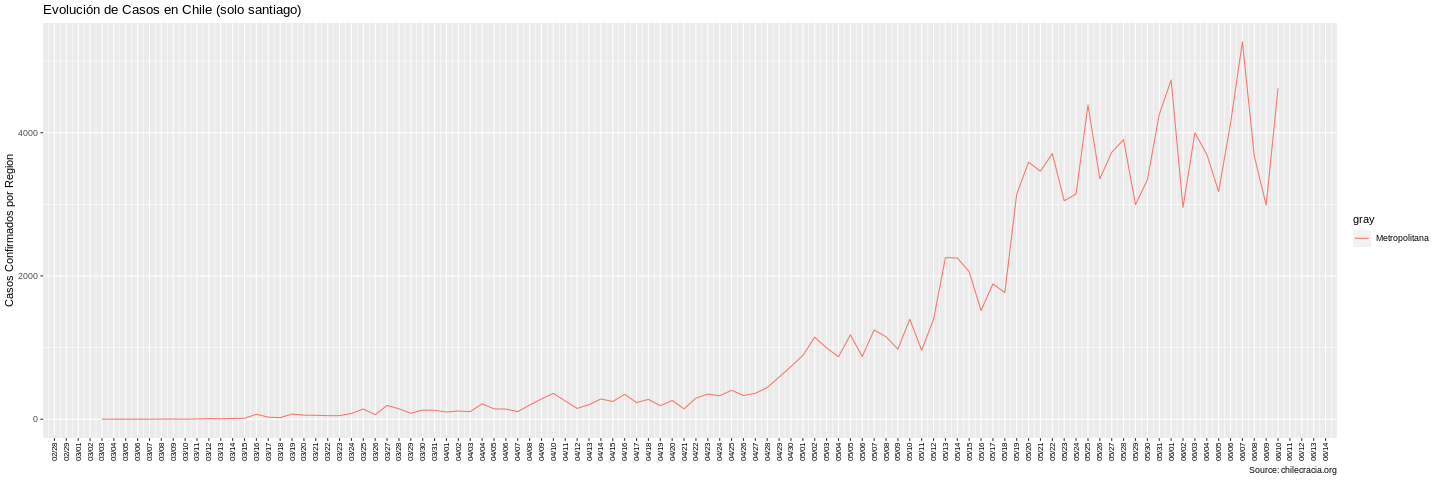

In [22]:
%%R -w 1440 -h 480 -u px
# agrupar los datos para el grafico 1
totalStgo<- data %>%
  filter(region == 'Metropolitana')%>%
  group_by(region, fecha)%>%
  summarize(total = sum(confirmados))


ggplot(totalStgo, aes(x = as.Date(fecha), y = total, group = region, color = region))+
  geom_line()+
  ggtitle('Evolución de Casos en Chile (solo santiago)')+
  labs(caption="Source: chilecracia.org", color = 'gray')+
  xlab('Fecha')+
  scale_x_date(date_labels = "%m/%d", date_breaks = 'day')+
  ylab('Casos Confirmados por Region')+ 
  theme(axis.text.x = element_text(
    colour = 'black', angle = 90, size = 8,
    hjust = 0.5, vjust = 0.5),axis.title.x=element_blank())